In [1]:
%pylab inline
from skimage.io import *
import seaborn as sns
sns.set_context('poster')
import pandas as pd
from scipy.signal import filtfilt, butter
from scipy.signal import resample

Populating the interactive namespace from numpy and matplotlib


In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#We start from tritrode project


###But we could not see many spikes

 <div class="row">
  <div class="col-md-4">
      <p>We assemble the tritrode, tip and electrode distance@<b>30um</b>.</p> 
      <img src="./data/IMG_0320.JPG" class="img-circle" alt="Cinque Terre" width="304" height="320">
  </div>
  <div class="col-md-4">
      <p>However we can not get spikes in electrodes even we stimulate the cell to fire.</p>
      <img src="./data/IMG_0327.JPG" class="img-circle" alt="Cinque Terre" width="304" height="320">
  </div>
  <div class="col-md-4">
      <p>To rule out the instrument bug, we use the other pippette to measure aroud the cell.</p> 
      <img src="./data/IMG_0358.JPG" class="img-circle" alt="Cinque Terre" width="304" height="320">
  </div>
</div>

<div class="well">
<p><b>However, we ocasionally see giant spikes which never generated from the cell we patch</b></p>
</div>

#Search of extracellular action potentials (EAP)

<div class="jumbotron">
<p>Where is the origin of extracellular spikes? How does it propogate?</p> 
</div>
###current consensus:



<html lang="en">
<body>
<div id="myButtons" class="consensus">
    <button type="button" class="btn btn-default btn-lg">soma</button>
    <button type="button" class="btn btn-primary btn-lg">visible radius</button>
    <button type="button" class="btn btn-success btn-lg">range</button>
    <button type="button" class="btn btn-info btn-lg">volume conduction</button>
</div>
</body>
</html> 

**Buzsáki, G. Large-scale recording of neuronal ensembles. Nat. Neurosci. 7, 446–451 (2004).**
<img src="./data/buzsaki_2004.png" class="img-rounded" alt="Cinque Terre" width="500" height="500">



  <blockquote>
    <p>Distance of the visible electrode tips from a single pyramidal cell (triangles) is indicated by arrows. The spike amplitude of neurons (>60 μV) within the gray cylinder <b>(50 μm radius), containing ∼100 neurons,</b> is large enough for separation by currently available clustering methods. Although the extracellularly recorded spike amplitude decreases rapidly with distance, neurons within a <b>radius of 140 μm</b>, containing ∼1,000 neurons in the rat cortex19,21, can be detected. Improved recording and clustering methods are therefore expected to record from larger number of neurons in the future. (Data are derived from simultaneous extracellular and intracellular recordings from the same pyramidal cells from ref. 19.)</p>
    <footer>György Buzsáki</footer>
  </blockquote>

**Buzsáki, G., Anastassiou, C. A. & KoCh, C. The origin of extracellular fields and currents--EEG, ECoG, LFP and spikes. Nat. Rev. Neurosci. 13, 407–420 (2012).**
<img src="./data/buzsaki_2012.png" class="img-rounded" alt="Cinque Terre" width="500" height="400">

  <blockquote>
    <p>Note that the <b>spike amplitude decreases rapidly with distance from the soma</b>, without a change in polarity within the pyramidal layer (the approximate area of which is shown by the box), in contrast to the quadrupole (that is, reversed polarity signals both above and below the pyramidal layers) formed along the somatodendritic axis.</p>
    <footer>György Buzsáki</footer>
  </blockquote>
 

#1. Measure volume conduction by artifical current



 <div class="row">
  <div class="col-md-4">
      <p><b>0um</b></p> 
      <img src="./data/slice_maxwell/IMG_0433.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
  <div class="col-md-4">
      <p><b>10um</b></p>
      <img src="./data/slice_maxwell/IMG_0434.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
  <div class="col-md-4">
      <p><b>20um</b></p> 
      <img src="./data/slice_maxwell/IMG_0435.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
</div>



 <div class="row">
  <div class="col-md-4">
      <p><b>30um</b></p> 
      <img src="./data/slice_maxwell/IMG_0436.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
  <div class="col-md-4">
      <p><b>40um</b></p>
      <img src="./data/slice_maxwell/IMG_0437.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
  <div class="col-md-4">
      <p><b>50um</b></p> 
      <img src="./data/slice_maxwell/IMG_0438.JPG" class="img-rounded" alt="Cinque Terre" width="500" height="400">
  </div>
</div>

In [10]:
df = pd.read_csv('./data/slice_maxwell/dis_0um.csv', skiprows=[0],  header=None)
raw_data = df.values

raw_data = asarray(raw_data,dtype=float)
raw_data = raw_data*1e6

dt = 2.5e-5
fs = 1/dt
T = len(raw_data)*dt
t = linspace(0,T,len(raw_data))
x = raw_data[:,1]

In [11]:
negthr = -median(abs(x))/0.675
_, mintab = peakdet(x, 15, t, negthr)

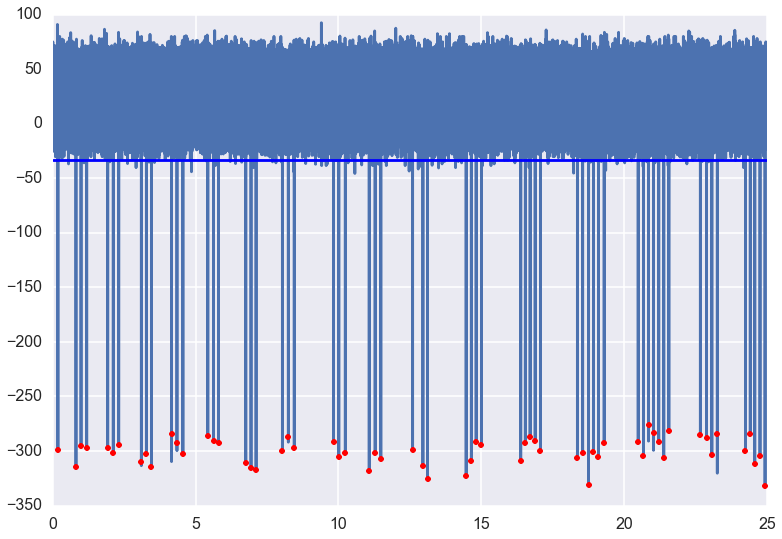

In [12]:
plot(t,x)
hold(True)
axhline(negthr)
plot(mintab[:,0],mintab[:,1],'r.')

In [49]:
negpeaks = [-301.98588709677415,
 -170.10227272727272,
 -123.7411357142857,
 -93.468741666666659,
 -78.275660714285706,
 -62.452830188679243,
 -60.352393617021278,
 -55.534274193548384,
 -53.9453125]

In [13]:
negpeaks = array(negpeaks)

In [14]:
distance = arange(0,90,10)
distance

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [15]:
from scipy.optimize import curve_fit

In [16]:
def func(x, a, b):
    return a / (x+b)

In [17]:
xdata = distance
ydata = -negpeaks
popt, pcov = curve_fit(func, xdata, ydata)

In [18]:
popt

array([ 4221.61309223,    14.06229961])


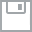
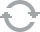
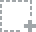
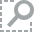
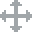
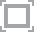
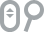
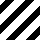
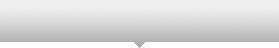
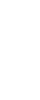
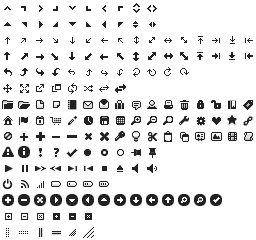
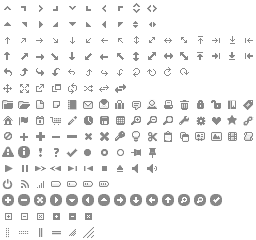
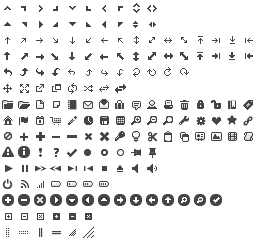
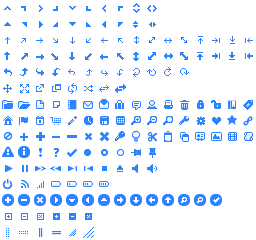
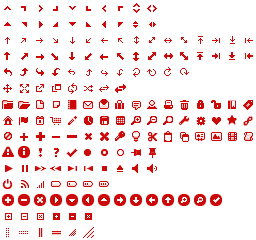
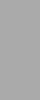
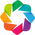
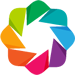

In [19]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

In [20]:
p = figure(
    tools="pan,box_zoom,reset,save",
    title="maxwell",
    x_axis_label='distance(um)', y_axis_label='negpeaks(uV)',
    plot_width=800, plot_height=400
)

fit_x = arange(0.01,xdata[-1]+0.5,0.05)
fit_y = func(arange(0.05,xdata[-1]+0.5,0.05), popt[0], popt[1])
p.circle(xdata, ydata, legend="measured value", fill_color="white", size=8)
p.line(fit_x, fit_y, legend="fited 1/x", line_color="orange", line_dash="4 4")
show(p)

ERROR:/Users/Chongxi/anaconda/lib/python2.7/site-packages/bokeh/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: e6ea019c-56ee-48e5-b053-582382441262


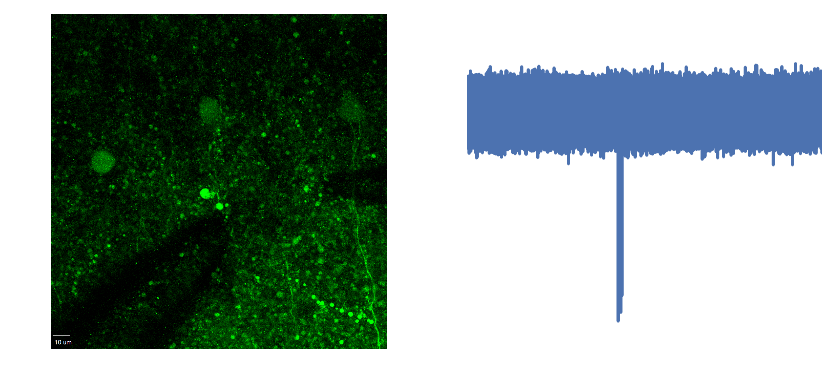

In [29]:
df = pd.read_csv('./data/EAP_critical_few.csv', skiprows=[0],  header=None)
raw_data = df.values

raw_data = asarray(raw_data,dtype=float)
raw_data = raw_data*1e6

dt = 2.5e-5
fs = 1/dt
T = len(raw_data)*dt
t = linspace(0,T,len(raw_data))
x = raw_data[:,1]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
ax1.imshow(imread('./data/First_time.tiff'));
ax1.grid('off');ax1.axis('off');

ax2.plot(t,x)
ax2.grid('off');ax2.axis('off');

In [26]:
img_g = MultiImage('./data/2015-09-30/CA1c2-population img/Capture 6_XY1443629019_Z000_T0_C1.tiff')
vol_data_g = img_g[0]
img_r = MultiImage('./data/2015-09-30/CA1c2-population img/Capture 6_XY1443629019_Z000_T0_C0.tiff')
vol_data_r = img_r[0]
g = vol_data_g[1,:,:,:]
r = vol_data_r[0,:,:,:]
g = np.max(g,axis=0)
r = np.max(r,axis=0)

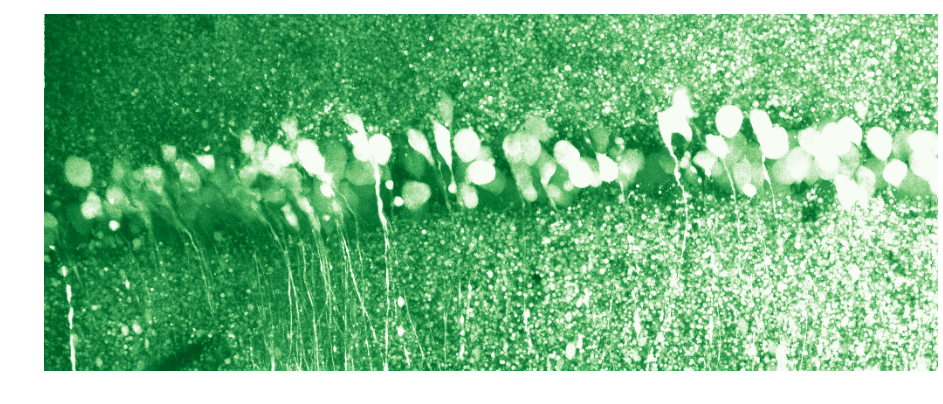

In [27]:
f = figure(dpi=1500,figsize=(16,8))
plt.imshow(g, cmap=plt.cm.Greens_r);
plt.grid('off');
plt.axis('off');

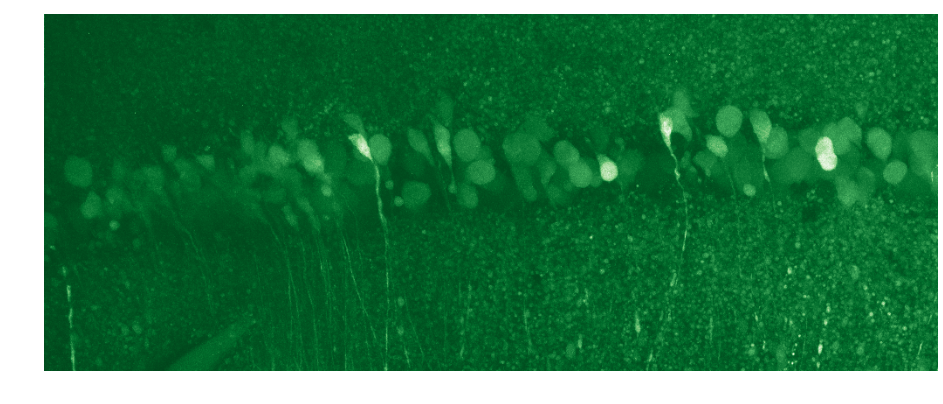

In [28]:
f = figure(dpi=1500,figsize=(16,8))
plt.imshow(r, cmap=plt.cm.Greens_r);
plt.grid('off');
plt.axis('off');